In [32]:
import zipfile
from zipfile import ZipFile
import math
from PIL import Image
import pytesseract
import cv2 as cv
import numpy as np

# loading the face detection classifier
face_cascade = cv.CascadeClassifier('readonly/haarcascade_frontalface_default.xml')

input_filenames=[]
input_imgs=[]
input_texts=[]
input_faces=[]

fileName='images.zip'

with zipfile.ZipFile('readonly/images.zip', 'r') as zipf:
    for entry in zipf.infolist(): 
        with zipf.open(entry) as f:
            input_filenames.append(entry.filename)
            img = Image.open(f).convert('RGB')
            input_imgs.append(img)

In [33]:
print(input_filenames)
print(input_imgs)
print(len(input_imgs))

['a-0.png', 'a-1.png', 'a-10.png', 'a-11.png', 'a-12.png', 'a-13.png', 'a-2.png', 'a-3.png', 'a-4.png', 'a-5.png', 'a-6.png', 'a-7.png', 'a-8.png', 'a-9.png']
[<PIL.Image.Image image mode=RGB size=3600x6300 at 0x7F452910BD68>, <PIL.Image.Image image mode=RGB size=3600x6300 at 0x7F44FBFC86A0>, <PIL.Image.Image image mode=RGB size=6300x3600 at 0x7F452D4FF4E0>, <PIL.Image.Image image mode=RGB size=3150x3600 at 0x7F452D5D8C88>, <PIL.Image.Image image mode=RGB size=3150x3600 at 0x7F452D5D8EF0>, <PIL.Image.Image image mode=RGB size=3150x3600 at 0x7F452D5D8CF8>, <PIL.Image.Image image mode=RGB size=3600x6300 at 0x7F44F2AFFE80>, <PIL.Image.Image image mode=RGB size=7200x6300 at 0x7F44F2AFFD30>, <PIL.Image.Image image mode=RGB size=3600x6300 at 0x7F44F2AFFDD8>, <PIL.Image.Image image mode=RGB size=3600x6300 at 0x7F44F2AFFE48>, <PIL.Image.Image image mode=RGB size=3600x6300 at 0x7F44F2AFFDA0>, <PIL.Image.Image image mode=RGB size=3150x3600 at 0x7F44F2AFFC50>, <PIL.Image.Image image mode=RGB size

In [34]:
for index in range (len(input_filenames)):
    print('Progress: {}%'.format((index+1)*100/len(input_filenames)))
    print("--Converting image to text--")
    input_texts.append(pytesseract.image_to_string(input_imgs[index]))
    
    print("--Get faces --")
    image_gray = cv.cvtColor(np.array(input_imgs[index]), cv.COLOR_BGR2GRAY)
    face_boxes = face_cascade.detectMultiScale(image_gray, 1.3, 5)
    input_faces.append([])
    for x,y,w,h in face_boxes:
        face = input_imgs[index].crop((x,y,x+w,y+h))
        face.thumbnail((100,100),Image.ANTIALIAS)
        input_faces[index].append(face)

Progress: 7.142857142857143%
--Converting image to text--
--Get faces --
Progress: 14.285714285714286%
--Converting image to text--
--Get faces --
Progress: 21.428571428571427%
--Converting image to text--
--Get faces --
Progress: 28.571428571428573%
--Converting image to text--
--Get faces --
Progress: 35.714285714285715%
--Converting image to text--
--Get faces --
Progress: 42.857142857142854%
--Converting image to text--
--Get faces --
Progress: 50.0%
--Converting image to text--
--Get faces --
Progress: 57.142857142857146%
--Converting image to text--
--Get faces --
Progress: 64.28571428571429%
--Converting image to text--
--Get faces --
Progress: 71.42857142857143%
--Converting image to text--
--Get faces --
Progress: 78.57142857142857%
--Converting image to text--
--Get faces --
Progress: 85.71428571428571%
--Converting image to text--
--Get faces --
Progress: 92.85714285714286%
--Converting image to text--
--Get faces --
Progress: 100.0%
--Converting image to text--
--Get faces 

In [35]:
def search(s):
    for index in range(len(input_filenames)):
        if (s in input_texts[index]):
            if(len(input_faces[index]) > 0):
                print("Result found in file {}".format(input_filenames[index]))
                height = math.ceil(len(input_faces[index])/5)
                contact_sheet = Image.new("RGB", (500, 100*height))
                x = 0
                y = 0
                for face in input_faces[index]:
                    contact_sheet.paste(face,(x,y))
                    if + 100 == contact_sheet.width:
                        x = 0
                        y += 100
                    else:
                        x += 100
                display(contact_sheet)
            else:
                print("Result found in file {} \nBut there were no faces in that file".format(input_filenames[index]))
    return

Result found in file a-0.png


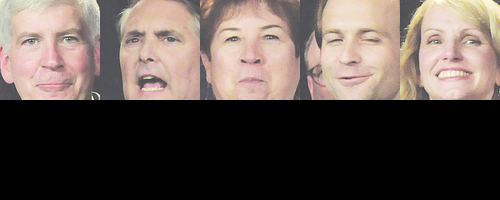

Result found in file a-3.png


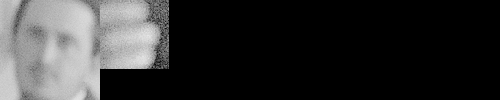

In [36]:
search('Christopher')

Result found in file a-0.png


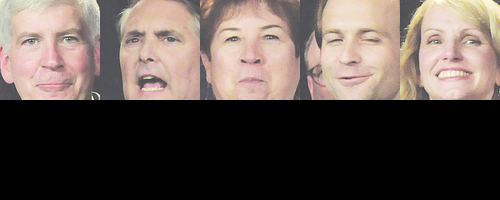

Result found in file a-1.png


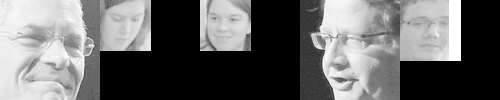

Result found in file a-10.png 
But there were no faces in that file
Result found in file a-13.png


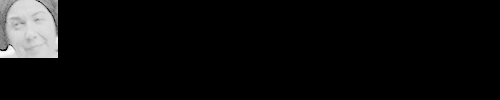

Result found in file a-2.png


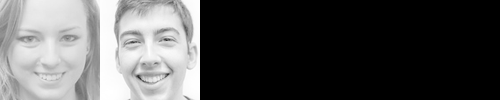

Result found in file a-3.png


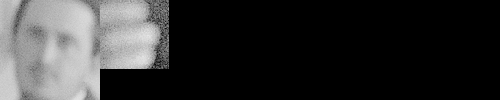

Result found in file a-8.png 
But there were no faces in that file


In [37]:
search ('Mark')